In [3]:
import pandas as pd
import seaborn as sns
from loader_util.utils import get_logistic_plot

sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\mhasa\GitHub\pyplay\framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,no_chd
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,no_chd
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,no_chd
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes_chd
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,no_chd


[INFO] training the logreg
Optimization terminated successfully.
         Current function value: 0.691403
         Iterations 4
[INFO] getting sklearn params
[INFO] getting the summary via statsmodels
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4188
Model:                          Logit   Df Residuals:                     4187
Method:                           MLE   Df Model:                            0
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                 -0.6249
Time:                        22:12:39   Log-Likelihood:                -2895.6
converged:                       True   LL-Null:                       -1782.1
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1      

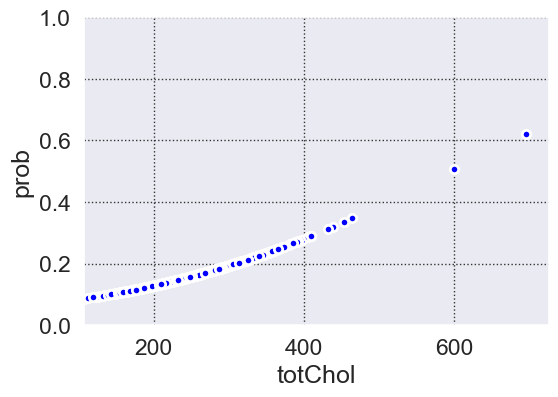

In [4]:
num_feat = "totChol"
param_df, logres = get_logistic_plot(num_feat=num_feat,
                                     group_feat="TenYearCHD",
                                     map_target={"yes_chd": 1, "no_chd": 0},
                                     df=df,
                                     solver='lbfgs')

In [5]:
param_df

,coef_,intercept_
0,0.216749,-1.738269


[INFO] training the logreg
Optimization terminated successfully.
         Current function value: 0.441229
         Iterations 5
[INFO] getting sklearn params
[INFO] getting the summary via statsmodels
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4188
Model:                          Logit   Df Residuals:                     4187
Method:                           MLE   Df Model:                            0
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                -0.03693
Time:                        22:13:14   Log-Likelihood:                -1847.9
converged:                       True   LL-Null:                       -1782.1
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
totChol 

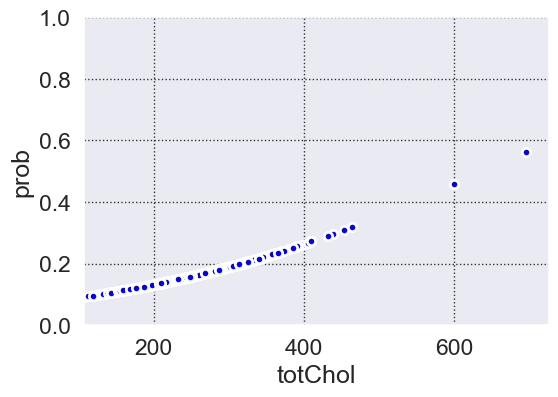

In [6]:
num_feat = "totChol"
param_df, logres = get_logistic_plot(num_feat=num_feat,
                                     group_feat="TenYearCHD",
                                     map_target={"yes_chd": 1, "no_chd": 0},
                                     df=df,
                                     scale=False,
                                     solver='liblinear')

In [10]:
coef_ = param_df['coef_'][0]
intercept_ = param_df['intercept_'][0]

In [11]:
def cac_prob(num_feat_val):
    part = 2.718281828 ** (intercept_ + coef_ * num_feat_val)
    return part / (1 + part)

In [12]:
logres.loc[:, "myprob"] = logres["totChol"].apply(cac_prob)

In [13]:
logres.head()

,prob,totChol,myprob
0,0.129092,195.0,0.129092
1,0.158085,250.0,0.158085
2,0.155245,245.0,0.155245
3,0.144299,225.0,0.144299
4,0.179157,285.0,0.179157


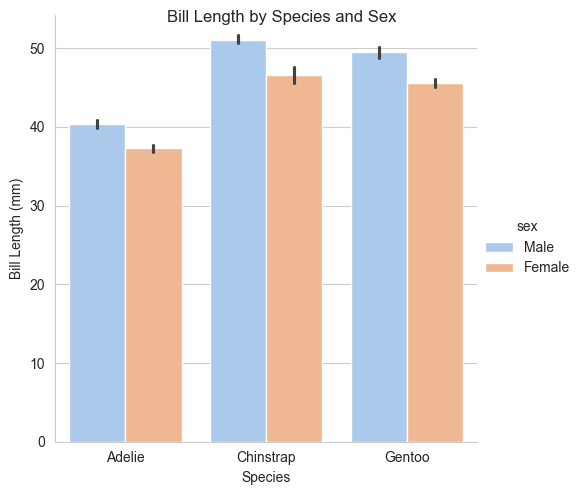

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a dataframe
df = sns.load_dataset("penguins")

# Create a grouped bar plot
g = sns.catplot(
    x="species",
    y="bill_length_mm",
    hue="sex",
    data=df,
    kind="bar",
    palette="pastel",
    dodge=True,
)

# Add a title and labels
g.fig.suptitle("Bill Length by Species and Sex")
g.set_axis_labels("Species", "Bill Length (mm)")

# Show the plot
plt.show()

# Unstack

In [8]:
data = {
    'year': [2023, 2023, 2022, 2022, 2021, 2023, 2022, 2021],
    'month': ['Jan', 'Feb', 'Mar', 'Apr', 'Jan', 'Feb', 'Mar', 'Apr'],
    'values': [1, 2, 3, 4, 5, 6, 7, 8, ]
}

df = pd.DataFrame(data)
df.head()

,year,month,values
0,2023,Jan,1
1,2023,Feb,2
2,2022,Mar,3
3,2022,Apr,4
4,2021,Jan,5


In [13]:
df.groupby(["year","month"])['values'].sum()

year  month
2021  Apr       8
      Jan       5
2022  Apr       4
      Mar      10
2023  Feb       8
      Jan       1
Name: values, dtype: int64

In [14]:
df.groupby(["year","month"])['values'].sum().unstack(level=1)

month,Apr,Feb,Jan,Mar
year,,,,
2021,8.0,NaN,5.0,NaN
2022,4.0,NaN,NaN,10.0
2023,NaN,8.0,1.0,NaN
